## Making Sentiment Analysis Better with NLTK & Scikit-Learn

So you might be asking, what exactly is "sentiment analysis"? 

Well, it's exactly what it sounds like: it's building a computational system to determine the emotional tone behind words. This is important because it allows you to gain an understanding of the attitudes, opinions, and emotions of the people in your data. At a higher level, sentiment analysis involves Natural language processing and artificial intelligence by taking the actual text element, transforming it into a format that a machine can read, and using statistics to determine the actual sentiment.

In this tutorial, we'll review some of the methods used to determine sentiment, but focus on the ways in which we can make sentiment analysis *better*. 


### Environment Setup

This guide was written in Python 3.6. If you haven't already, download Python and Pip. Next, you’ll need to install several packages that we’ll use throughout this tutorial:

``` 
pip3 install re
pip3 install nltk
pip3 install sklearn
```

Lastly, download the data we'll be working with in this example. You can find this in your folder as `negative_tweets` and `positive_tweets`.

Now you're all set to begin!

Sentiment Analysis isn't a new problem. There are thousands of labeled data out there, labels varying from simple positive and negative to more complex systems that determine *how* positive or negative is a given text. With that said, I've selected a pre-labeled set of data consisting of tweets from Twitter. Using this data, we'll begin by building a sentiment analysis model with scikit-learn. 

For those of you unfamiliar with scikit-learn, `scikit-learn` is a Python module with built-in implemented machine learning algorithms. In this tutorial, we'll specifically use the Logistic Regression model, which is a linear model commonly used for classifying binary data.

In [1]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 
# if this doesn't work, try: from sklearn.cross_validation import train_test_split

# 1. Building Sentiment Classifier using Scikit-Learn package

### Preparing the Data

To implement our linear classifier, we need the twitter data in a format that allows us to feed it into the classifier. Using the `sklearn.feature_extraction.text.CountVectorizer`, we will convert the text documents to a matrix of token counts. As you'll see soon enough, these vector counts will be what the classifier will ultimately use to train. So first, we import all the needed modules: 

But before we even get to vectorizing, we haven't even read in our data! Each file is a text file where each line is a sentence, so we can use the built-in `open()` function to split the file into tweets and append them to lists. Note that text and labels have to be separated for the test phase of this example!

In [3]:
text_pos = []
labels_pos = []
with open("../data/pos_tweets.txt") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')

text_neg = []
labels_neg = []
with open("../data/neg_tweets.txt") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')

Now that the data is properly stored in Python lists, it's time to split this data into training and test data. For the purpose of this tutorial, we'll keep 80% for training and 20% for testing -- we do this with Python list slicing! 

In [4]:
training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.8)*len(text_pos)):] + text_neg[int((.8)*len(text_neg)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):] + labels_neg[int((.8)*len(labels_neg)):]

Next, we initialize a vectoriser with the CountVectorizer class. Because we haven't pre-processed any of the data, we'll set lowercase to `False` and exclude stop word removal or stemming. 

In [5]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

Next, we use the `fit_transform()` method to transform our corpus data into feature vectors. Since the input needed is a list of strings, we concatenate all of our training and test data. 

In [6]:
features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() # for easy use

As a final step, we'll split the training data to get an evaluation set through scikit-learn's built-in cross validation method. All we need to do is provide the data and assign a training percentage (in this case, 80%).

In [7]:
x_train, x_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)

### Building Model - Linear Classifier

Finally, we can build the classifier for this corpus! As mentioned before, we'll be using the Logistic Regression from scikit-learn, so we'll start there: 

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

Once the model is initialized, we have to fit it to our specific dataset, so we use scikit-learn's `fit()` method to do so:

In [9]:
log_model = log_model.fit(x_train, y_train)

/Users/mlee89/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


And finally, we use this classifier to label the evaluation set we created earlier:

In [10]:
test_pred = log_model.predict(x_test)

### Tesing Model Accuracy

Now just for our own "fun", let's take a look at some of the classifications our model makes! We'll choose a random set and then call our model on each! 

In [11]:
import random
spl = random.sample(range(len(test_pred)), 10)
for text, sentiment in zip(test_text, test_pred[spl]):
    print (sentiment, text)

pos "Love that the Obamas are bringing back date night. Men, take note  http://bit.ly/ebPBZ"

neg "loves chocolate milk  and that is GF YEAH.."

neg "loving life... and loving you "

pos "Lunch date with @Londonmitch to go to Leathenhall Market's cheese shop was really nice "

neg "Made my evening: Starbucks barista complimented me on my hamsa scarf. When he heard I designed it and sell them on etsy he was "

neg "Matt came to visit!  canton with him for dinner then prolly stopping somewhere for drinks and the cavs "

neg "May be going to London next week "

neg "me and rosa are going 2 start our own youtube channel! i'm super excited that we get 2 share our RaNdOmNeSs with the world!!!! "

neg "Modern warfare 2 gameplay looks goood  #xboxe3"

neg "Momz just made it back from Vegas, yayyyyy! "



Just glancing over the examples above, it's pretty obvious there are some misclassifications. But obviously we want to do more than just 'eyeball' the data, so let's actually calculate the accuracy score. 

What's the point in creating a machine learning algorithm if you have no idea how it performs? This is why we left some of the dataset for testing purposes. In scikit-learn, there is a function called sklearn.metrics.accuracy_score which calculates the accuracy percentage. Using this, we see that this model has an accuracy of about 76%. 

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.7601246105919003


Yikes. 76% is better than randomly guessing, but still pretty low as far as classification accuracy goes. *Maybe* this is the best we can do with this dataset, but maybe we *can* do better? So let's give it a try with the Python module `nltk`. 

# 2. Building Sentiment Classifier using NLTK package

### Preparing the Data 

`nltk` is a much different from `scikit-learn`. `nltk` specializes and is *made for* natural language processing tasks, so needless to say, it was expected that `scikit-learn` wouldn't necessarily be the best choice. 
 
With that said, we'll now use `nltk` to build a sentiment analysis model on the same dataset. `nltk` requires a different data format, which is why I've implemented the function below:

In [64]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
print(format_sentence("The cat is very cute"))

{'The': True, 'cat': True, 'is': True, 'very': True, 'cute': True}


Here, `format_sentence` changes each tweet into a dictionary of words mapped to `True` booleans. Though not obvious from this function alone, this will eventually allow us to train our prediction model by splitting the text into its tokens, i.e. <i>tokenizing</i> the text. You'll learn about why this format is important in a later section.

Using the data on the github repo, we'll actually format the positively and negatively labeled data.

In [70]:
import io
negative = []
with io.open("textsample2.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        txt.append([format_sentence(i), 'neg'])

<ipython-input-70-fc93136b9a64>:3: DeprecationWarning: 'U' mode is deprecated
  with io.open("textsample2.txt", 'rU', encoding='utf-8') as f:


In [71]:
positive = []
with io.open("textsample1.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        neg.append([format_sentence(i), 'pos'])

<ipython-input-71-fbc2a8eadb81>:2: DeprecationWarning: 'U' mode is deprecated
  with io.open("textsample1.txt", 'rU', encoding='utf-8') as f:


Next, we'll split the labeled data into the training and test data, just as we did before.

In [72]:
training = positive[:int((.8)*len(positive))] + negative[:int((.8)*len(negative))]
test = positive[int((.8)*len(positive)):] + negative[int((.8)*len(negative)):]

### Building a Classifier

All NLTK classifiers work with feature structures, which can be simple dictionaries mapping a feature name to a feature value. In this example, we use the Naive Bayes Classifier, which makes predictions based on the word frequencies associated with each label of positive or negative.

In [73]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

ValueError: A ELE probability distribution must have at least one bin.

Since the Naive Bayes Classifier is based entirely off of the frequencies associated with each label for a given word, we can call a function `show_most_informative_features()` to see which words are the highest indicators of a positive or negative label:

In [19]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     19.4 : 1.0
                    love = True              pos : neg    =     19.0 : 1.0
                 awesome = True              pos : neg    =     17.2 : 1.0
                headache = True              neg : pos    =     16.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
                     New = True              pos : neg    =      9.7 : 1.0
                    haha = True              pos : neg    =      9.3 : 1.0


Notice that there are three columns. Column 1 is why we used `format_sentence()` to map each word to a `True` value. What it does is count the number of occurences of each word for both labels to compute the ratio between the two, which is what column 3 represents. Column 2 lets us know which label occurs more frequently (the label on the left is the label most associated with the corresponding word. 

### Classification

Just to see how our model works, let's try the classifier out with a positive example: 

In [74]:
example1 = "Twilio is an awesome company!"

print(classifier.classify(format_sentence(example1)))

NameError: name 'classifier' is not defined

Now let's try out an example we'd expect a negative label: 

In [21]:
example2 = "I'm sad that Twilio doesn't have even more blog posts!"

print(classifier.classify(format_sentence(example2)))

neg


So what happens when we mix words of different sentiment labels? Let's take a look at this example:

In [22]:
example3 = "I have no headache!"

print(classifier.classify(format_sentence(example3)))

neg


And we've found a mislabel! Naive Bayes doesn't consider the relationship *between* words, which is why it wasn't able to catch the fact that "no" acted as a negator to the word `headache`. Instead, it read two negative indicators and classified it as such. 

Given that, we can probably expect a less than perfect accuracy rate.

### Accuracy

Just like `scikit-learn`, nltk has a built in method that computes the accuracy rate of our model:

In [23]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.8308457711442786


And we have improved performance! Awesome. Now, 83% is fairly solid, but it could be better! If you look at the actual data, you'll see that the data is kind of messy - there are typos, abbreviations, grammatical errors of all sorts. So how do we handle that? Can we handle that? Stay tuned for more soon. 

# 3. Validating Classifier Output using Count and Visualization

In [24]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mlee89/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mlee89/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### In this case we are validating text_pos (positive data) from the above examples

In [25]:
textfile = []
with open("../data/pos_tweets.txt") as f:
    for i in f:
        textfile.append(i) 

words = nltk.word_tokenize(str(textfile))

### Preprocessing data to remove stop words

In [26]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])

In [27]:
# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 2]

# Remove numbers
# words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
words = [word.lower() for word in words]

# Stemming words seems to make matters worse, disabled
# stemmer = nltk.stem.snowball.SnowballStemmer('german')
# words = [stemmer.stem(word) for word in words]

# Remove stopwords
words = [word for word in words if word not in default_stopwords]

### Display Frequency count for dataset

In [28]:
# Calculate frequency distribution
fdist = nltk.FreqDist(words)

# Output top 50 words

for word, frequency in fdist.most_common(10):
    print(u'{};{}'.format(word, frequency))

love;67
good;58
day;45
lakers;40
taylor;40
new;38
great;33
see;33
going;33
swift;33


### Visualizing the Frequency Count

In [29]:
import pip
pip.main(['install', '--user', 'wordcloud'])

AttributeError: module 'pip' has no attribute 'main'

If there's an error in the above code, it might be because the pip package is out of date. In that case, install "wordcloud" package using pip command on your commandline:
```pip3 install wordcloud```

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist)

(-0.5, 799.5, 399.5, -0.5)

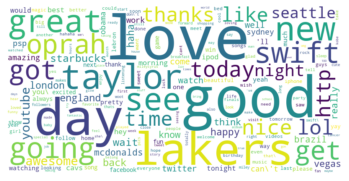

In [33]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Complete Your Assignment Questions Here

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [182]:
dataset1 = pd.read_csv('desktop/textsample1.txt', sep = '\t',encoding = 'utf-8',header = None)
dataset1.columns = ['class', 'text']

In [183]:
dataset2 = pd.read_csv('desktop/textsample2.txt', sep = '\t',encoding = 'utf-8',header= None)
dataset2.columns = ['class','text']

In [184]:
dataset1.head()

,class,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [185]:
dataset2.head()

,class,text
0,1,I really enjoyed the Da Vinci Code but thought...
1,1,"And the Da Vinci code is AMAZING, 30 pages lef..."
2,1,I still love MISSION IMPOSSIBLE even if it did...
3,1,Kelse and I spontaneously went to a 10pm showi...
4,1,I have two awesome Harry Potter costumes I'm p...


## 

The above two dataframes are the 2 textfiles given respectively.

## For Text Sample1

In [186]:
dataset1.shape

(3950, 2)

we have 3950 observations and 2 columns

In [187]:
dataset1['class'].value_counts()

1    3943
0       7
Name: class, dtype: int64

In [188]:
dataset2['class'].value_counts()

0    2975
1       6
Name: class, dtype: int64

Removing unwanted Characters patterns in the text file.

In [189]:

import re

In [190]:
def remove_char(text,char):
    r = re.findall(char, text)
    for i in r:
            text = re.sub(i,'',text)
    return text        

In [191]:
dataset1['cleaned_txt'] = np.vectorize(remove_char)(dataset1['text'],"\!@$%^&*:;?-/.")

In [192]:
dataset1

,class,text,cleaned_txt
0,1,The Da Vinci Code book is just awesome.,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...,I liked the Da Vinci Code but it ultimatly did...
...,...,...,...
3945,0,I have read 1984 and I hate Harry Potter..,I have read 1984 and I hate Harry Potter..
3946,0,10 Things I Hate About You + A Knight's Tale *...,10 Things I Hate About You + A Knight's Tale *...
3947,0,Watched'10 things I hate about you'and 2 / 3 o...,Watched'10 things I hate about you'and 2 / 3 o...
3948,0,"Watch it: 10 Things I Hate About You, The Pati...","Watch it: 10 Things I Hate About You, The Pati..."


In [193]:
dataset1['cleaned_txt'] = dataset1['cleaned_txt'].str.replace("[^a-zA-z#]",' ')

/var/folders/8r/92tf7fd52r5fyx285qs9zl7m0000gn/T/ipykernel_15860/3840922796.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1['cleaned_txt'] = dataset1['cleaned_txt'].str.replace("[^a-zA-z#]",' ')


In [194]:
dataset1

,class,text,cleaned_txt
0,1,The Da Vinci Code book is just awesome.,The Da Vinci Code book is just awesome
1,1,this was the first clive cussler i've ever rea...,this was the first clive cussler i ve ever rea...
2,1,i liked the Da Vinci Code a lot.,i liked the Da Vinci Code a lot
3,1,i liked the Da Vinci Code a lot.,i liked the Da Vinci Code a lot
4,1,I liked the Da Vinci Code but it ultimatly did...,I liked the Da Vinci Code but it ultimatly did...
...,...,...,...
3945,0,I have read 1984 and I hate Harry Potter..,I have read and I hate Harry Potter
3946,0,10 Things I Hate About You + A Knight's Tale *...,Things I Hate About You A Knight s Tale ...
3947,0,Watched'10 things I hate about you'and 2 / 3 o...,Watched things I hate about you and o...
3948,0,"Watch it: 10 Things I Hate About You, The Pati...",Watch it Things I Hate About You The Pati...


Removing the stop words that doesn't provide any meaning to the algorithm

In [195]:
dataset1['cleaned_txt'] = dataset1['cleaned_txt'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [196]:
dataset1

,class,text,cleaned_txt
0,1,The Da Vinci Code book is just awesome.,Vinci Code book just awesome
1,1,this was the first clive cussler i've ever rea...,this first clive cussler ever read even books ...
2,1,i liked the Da Vinci Code a lot.,liked Vinci Code
3,1,i liked the Da Vinci Code a lot.,liked Vinci Code
4,1,I liked the Da Vinci Code but it ultimatly did...,liked Vinci Code ultimatly didn seem hold
...,...,...,...
3945,0,I have read 1984 and I hate Harry Potter..,have read hate Harry Potter
3946,0,10 Things I Hate About You + A Knight's Tale *...,Things Hate About Knight Tale Brokeback Mountain
3947,0,Watched'10 things I hate about you'and 2 / 3 o...,Watched things hate about brokeback mountain
3948,0,"Watch it: 10 Things I Hate About You, The Pati...",Watch Things Hate About Patirot Knights Tale F...


tokenizing each sentence into a list of words

In [197]:
token_txt = dataset1['cleaned_txt'].apply(lambda x:x.split()) #splitting all words by whitespace will be done here
token_txt.head()

0                   [Vinci, Code, book, just, awesome]
1    [this, first, clive, cussler, ever, read, even...
2                                 [liked, Vinci, Code]
3                                 [liked, Vinci, Code]
4    [liked, Vinci, Code, ultimatly, didn, seem, hold]
Name: cleaned_txt, dtype: object

In [198]:
import nltk

stemming those list of words into their root words

In [199]:
from nltk.stem.porter import *
stem = PorterStemmer()
token_txt = token_txt.apply(lambda x: [stem.stem(i) for i in x]) #all words here will be stematized

In [200]:
#all the tokens will come back to the original form by combining them

for i in range(len(token_txt)):
    token_txt[i] = ' '.join(token_txt[i]) #all the words here will chain into single sentence 
dataset1['cleaned_txt'] = token_txt

In [201]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


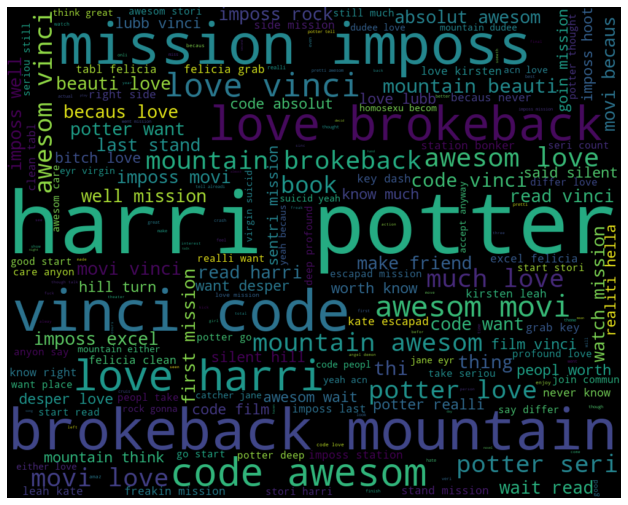

In [202]:
all_words = ' '.join([text for text in dataset1['cleaned_txt']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000,height=800,random_state=30,max_font_size=200).generate(all_words)
plt.figure(figsize=(11,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [203]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [217]:

bow_vector = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vector.fit_transform(dataset1['cleaned_txt']) 
bow.shape

(3950, 308)

In [218]:

from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(bow, dataset1['class'],
                                                    test_size=5, random_state=72)

In [219]:

print("a_train_shape : ",a_train.shape)
print("a_test_shape : ",a_test.shape)
print("b_train_shape : ",b_train.shape)
print("b_test_shape : ",b_test.shape)

a_train_shape :  (3945, 308)
a_test_shape :  (5, 308)
b_train_shape :  (3945,)
b_test_shape :  (5,)


Naive Bayes Classifier for text sample 1

In [220]:

from sklearn.naive_bayes import MultinomialNB  # Here is Naive Bayes Classifier

model_naive = MultinomialNB().fit(a_train, b_train) 
predicted_naive = model_naive.predict(a_test)

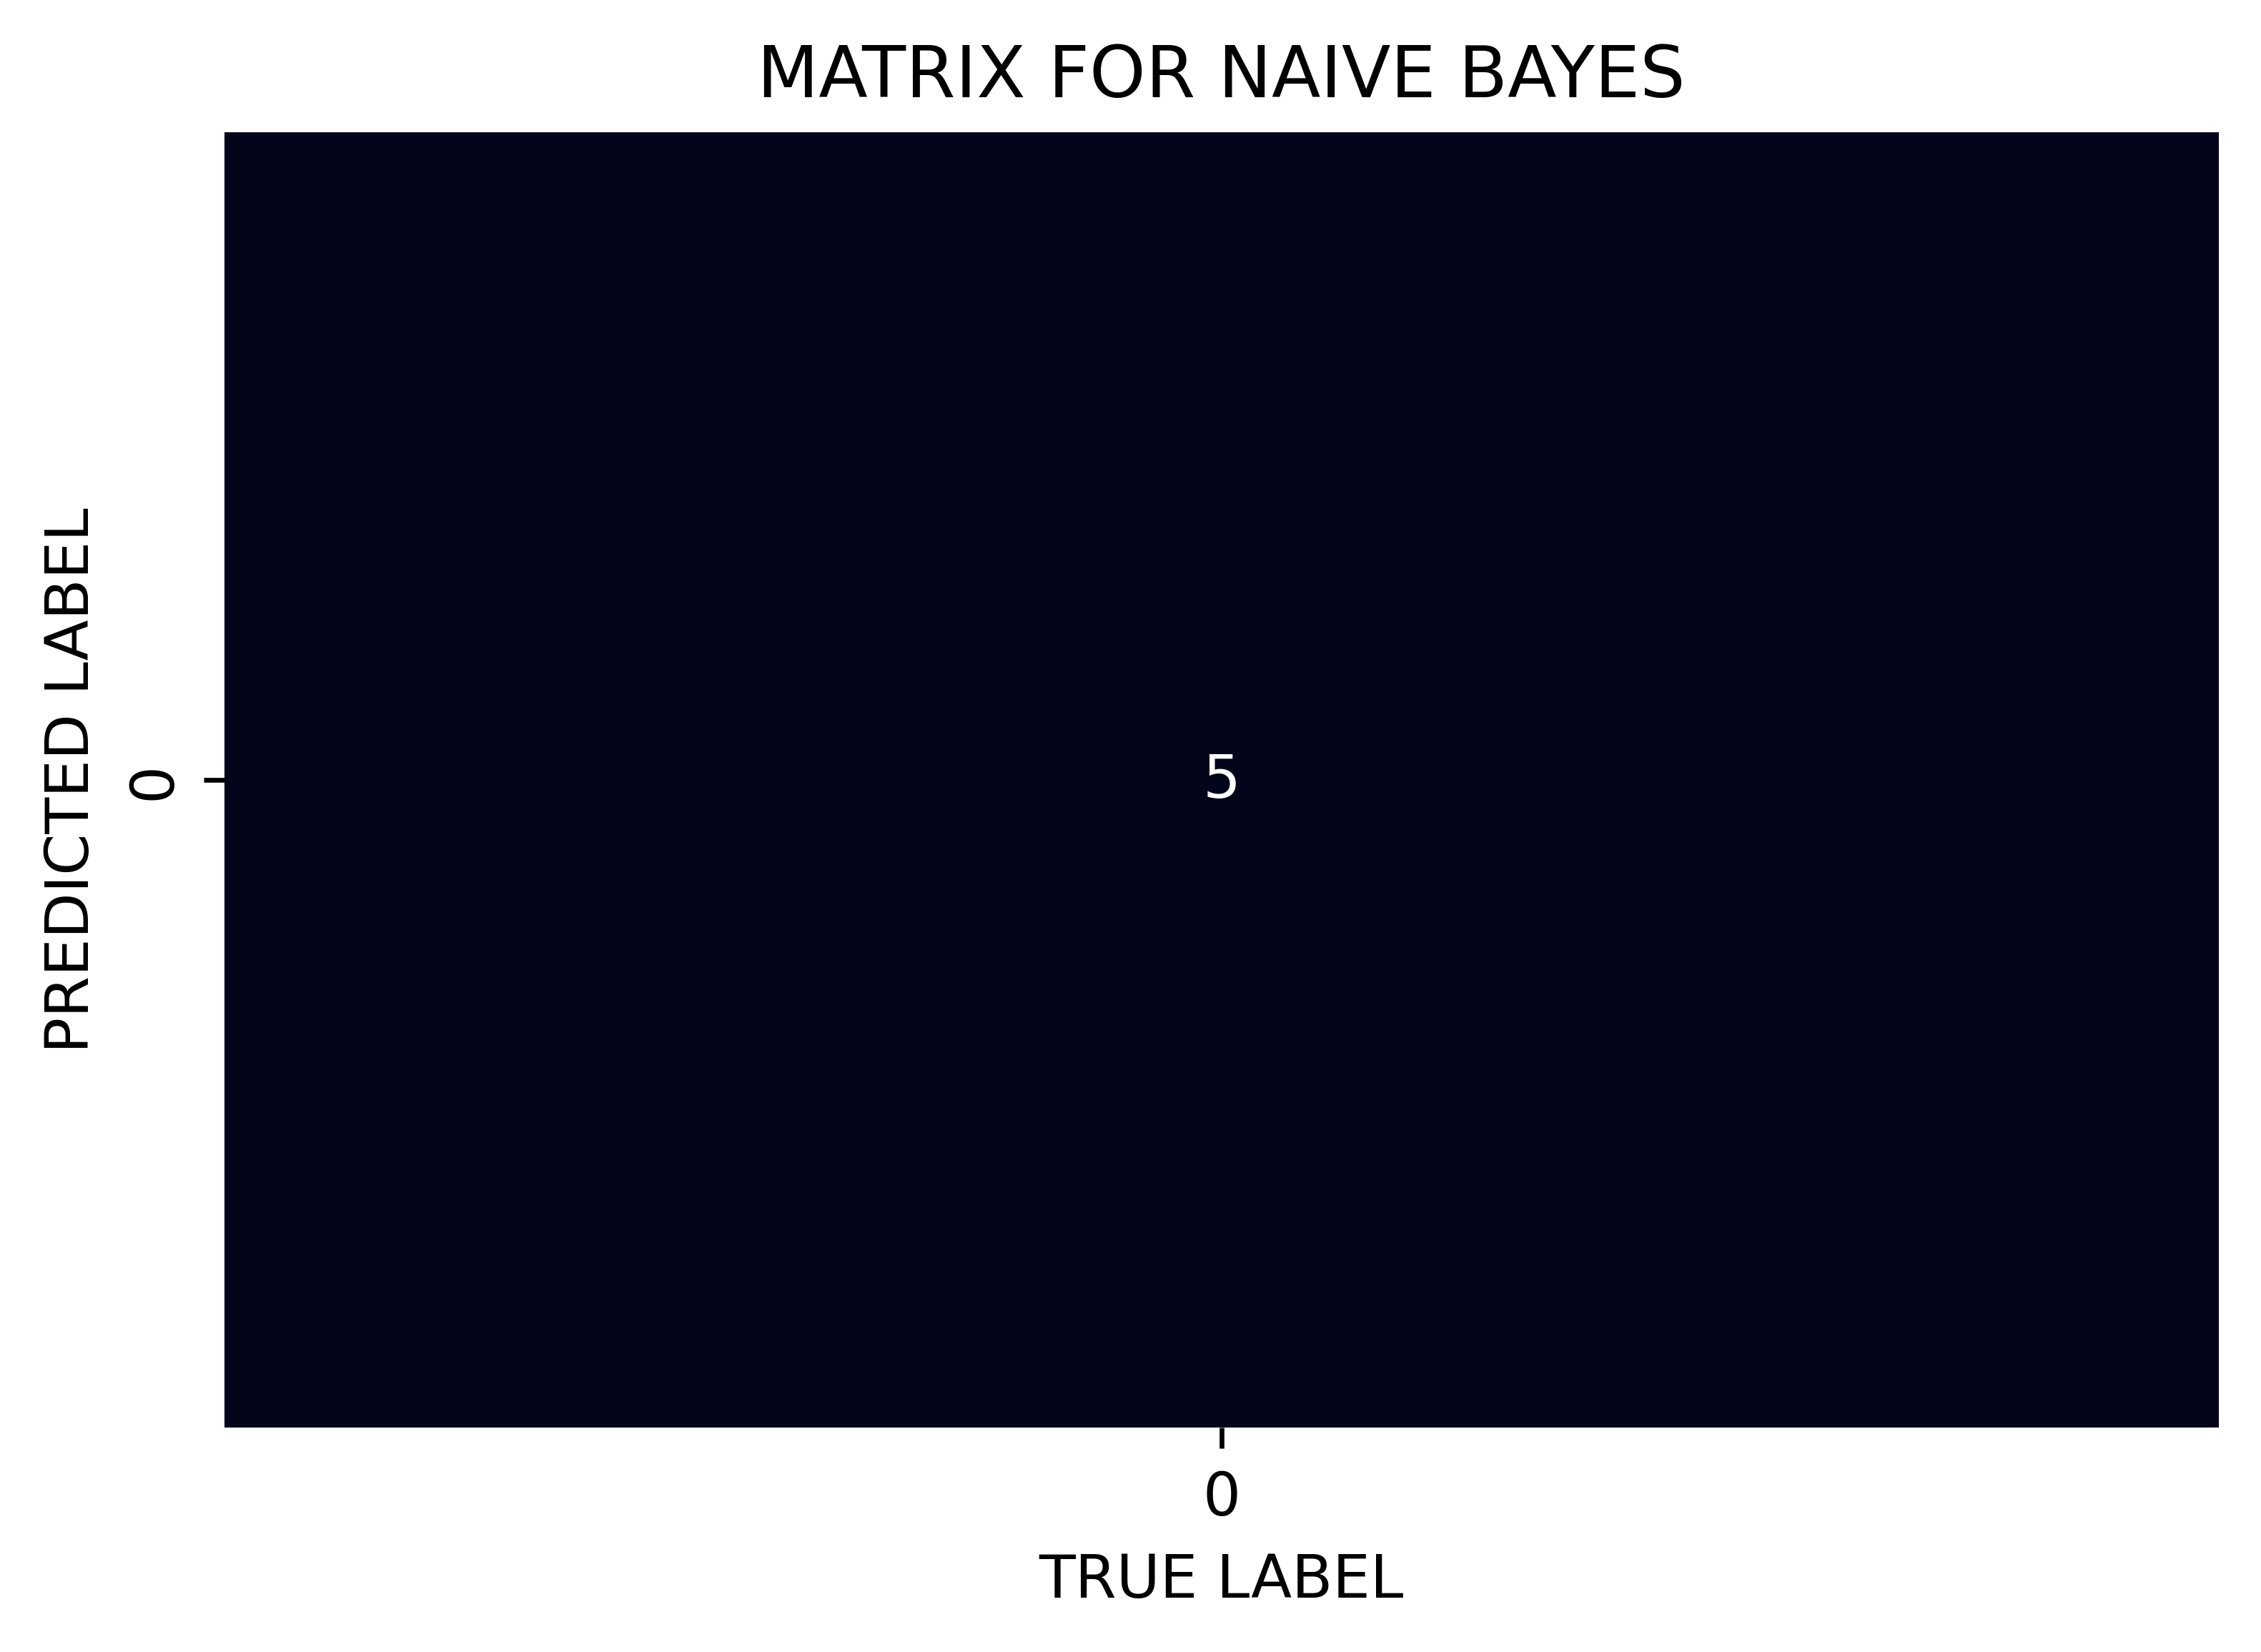

In [221]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(b_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('MATRIX FOR NAIVE BAYES')
plt.xlabel('TRUE LABEL')
plt.ylabel('PREDICTED LABEL')
plt.savefig("confusion_matrix.png")
plt.show()

In [247]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, b_test)
print("NAIVE BAYES FOR TEST SAMPLE 1 IS ",score_naive)

NAIVE BAYES FOR TEST SAMPLE 1 IS  0.9852448021462106


In [248]:
import textblob

In [279]:
pol = lambda a: textblob(a).sentiment.polarity

dataset1['polarity'] = dataset1['cleaned_txt']

In [302]:
s=[]
for i in dataset1['polarity']:
    if i >= 0:
        s.append('positive')
    else:
        s.append('negative')

TypeError: '>=' not supported between instances of 'str' and 'int'

In [263]:
dataset_s = pd.DataFrame(p, columns =['Sentiment']) 
dataset1=pd.concat([dataset1,dataset_s], axis=1)

In [264]:
dataset1

,class,text,cleaned_txt,Sentiment,Sentiment
0,1,The Da Vinci Code book is just awesome.,vinci code book just awesom,NaN,NaN
1,1,this was the first clive cussler i've ever rea...,thi first clive cussler ever read even book li...,NaN,NaN
2,1,i liked the Da Vinci Code a lot.,like vinci code,NaN,NaN
3,1,i liked the Da Vinci Code a lot.,like vinci code,NaN,NaN
4,1,I liked the Da Vinci Code but it ultimatly did...,like vinci code ultimatli didn seem hold,NaN,NaN
...,...,...,...,...,...
3945,0,I have read 1984 and I hate Harry Potter..,have read hate harri potter,NaN,NaN
3946,0,10 Things I Hate About You + A Knight's Tale *...,thing hate about knight tale brokeback mountain,NaN,NaN
3947,0,Watched'10 things I hate about you'and 2 / 3 o...,watch thing hate about brokeback mountain,NaN,NaN
3948,0,"Watch it: 10 Things I Hate About You, The Pati...",watch thing hate about patirot knight tale fou...,NaN,NaN


In [265]:
dataset1.to_csv('text1_sentiment.txt', index=None, sep=',')

output txt file with sentiment column being classified as positive or negative for text sample 1

## For TextSample 2

naive bayes analysis for text sample 2
since the dataset has already been read above, initiating the cleaning process.

In [266]:
dataset2['cleaned_txt'] = np.vectorize(remove_char)(dataset2['text'],"\!@$%^&*:;?-/.")

In [267]:
dataset2['cleaned_txt'] = dataset2['cleaned_txt'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [268]:
dataset2

,class,text,cleaned_txt
0,1,I really enjoyed the Da Vinci Code but thought...,really enjoyed Vinci Code thought would disapp...
1,1,"And the Da Vinci code is AMAZING, 30 pages lef...","Vinci code AMAZING, pages left"
2,1,I still love MISSION IMPOSSIBLE even if it did...,still love MISSION IMPOSSIBLE even make fall 1...
3,1,Kelse and I spontaneously went to a 10pm showi...,Kelse spontaneously went 10pm showing MISSION ...
4,1,I have two awesome Harry Potter costumes I'm p...,have awesome Harry Potter costumes planning 20...
...,...,...,...
2976,0,Brokeback Mountain was boring.,Brokeback Mountain boring.
2977,0,So Brokeback Mountain was really depressing.,Brokeback Mountain really depressing.
2978,0,"As I sit here, watching the MTV Movie Awards, ...","here, watching Movie Awards, reminded much des..."
2979,0,Ok brokeback mountain is such a horrible movie.,brokeback mountain such horrible movie.


In [269]:
token_txt2 = dataset2['cleaned_txt'].apply(lambda x:x.split()) #all words will be splited by whitespace
token_txt2.head()

0    [really, enjoyed, Vinci, Code, thought, would,...
1                 [Vinci, code, AMAZING,, pages, left]
2    [still, love, MISSION, IMPOSSIBLE, even, make,...
3    [Kelse, spontaneously, went, 10pm, showing, MI...
4    [have, awesome, Harry, Potter, costumes, plann...
Name: cleaned_txt, dtype: object

In [270]:
stem2 = PorterStemmer()
token_txt2 = token_txt2.apply(lambda x: [stem2.stem(i) for i in x]) #all words will be stemmatized here

In [271]:
for i in range(len(token_txt2)):
    token_txt2[i] = ' '.join(token_txt2[i]) #all words will be chained in to single sentence
dataset2['cleaned_txt'] = token_txt2

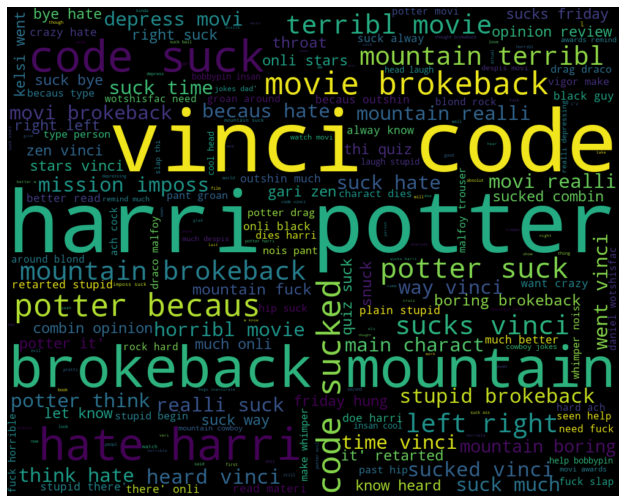

In [272]:
all_words = ' '.join([text for text in dataset2['cleaned_txt']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000,height=800,random_state=30,max_font_size=150).generate(all_words)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [273]:

bow_vector = CountVectorizer(max_df=0.50 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vector.fit_transform(dataset2['cleaned_txt']) 
bow.shape

(2981, 367)

In [274]:
#replacing all values by 0 
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(bow, dataset2['class'],
                                                    test_size=0.5, random_state=72)

In [275]:

print("a_train_shape : ",a_train.shape)
print("a_test_shape : ",a_test.shape)
print("b_train_shape : ",b_train.shape)
print("b_test_shape : ",b_test.shape)

a_train_shape :  (1490, 367)
a_test_shape :  (1491, 367)
b_train_shape :  (1490,)
b_test_shape :  (1491,)


Naive Bayes Classifier for text sample 2

In [276]:
model_naive = MultinomialNB().fit(a_train, b_train) 
predicted_naive = model_naive.predict(a_test)

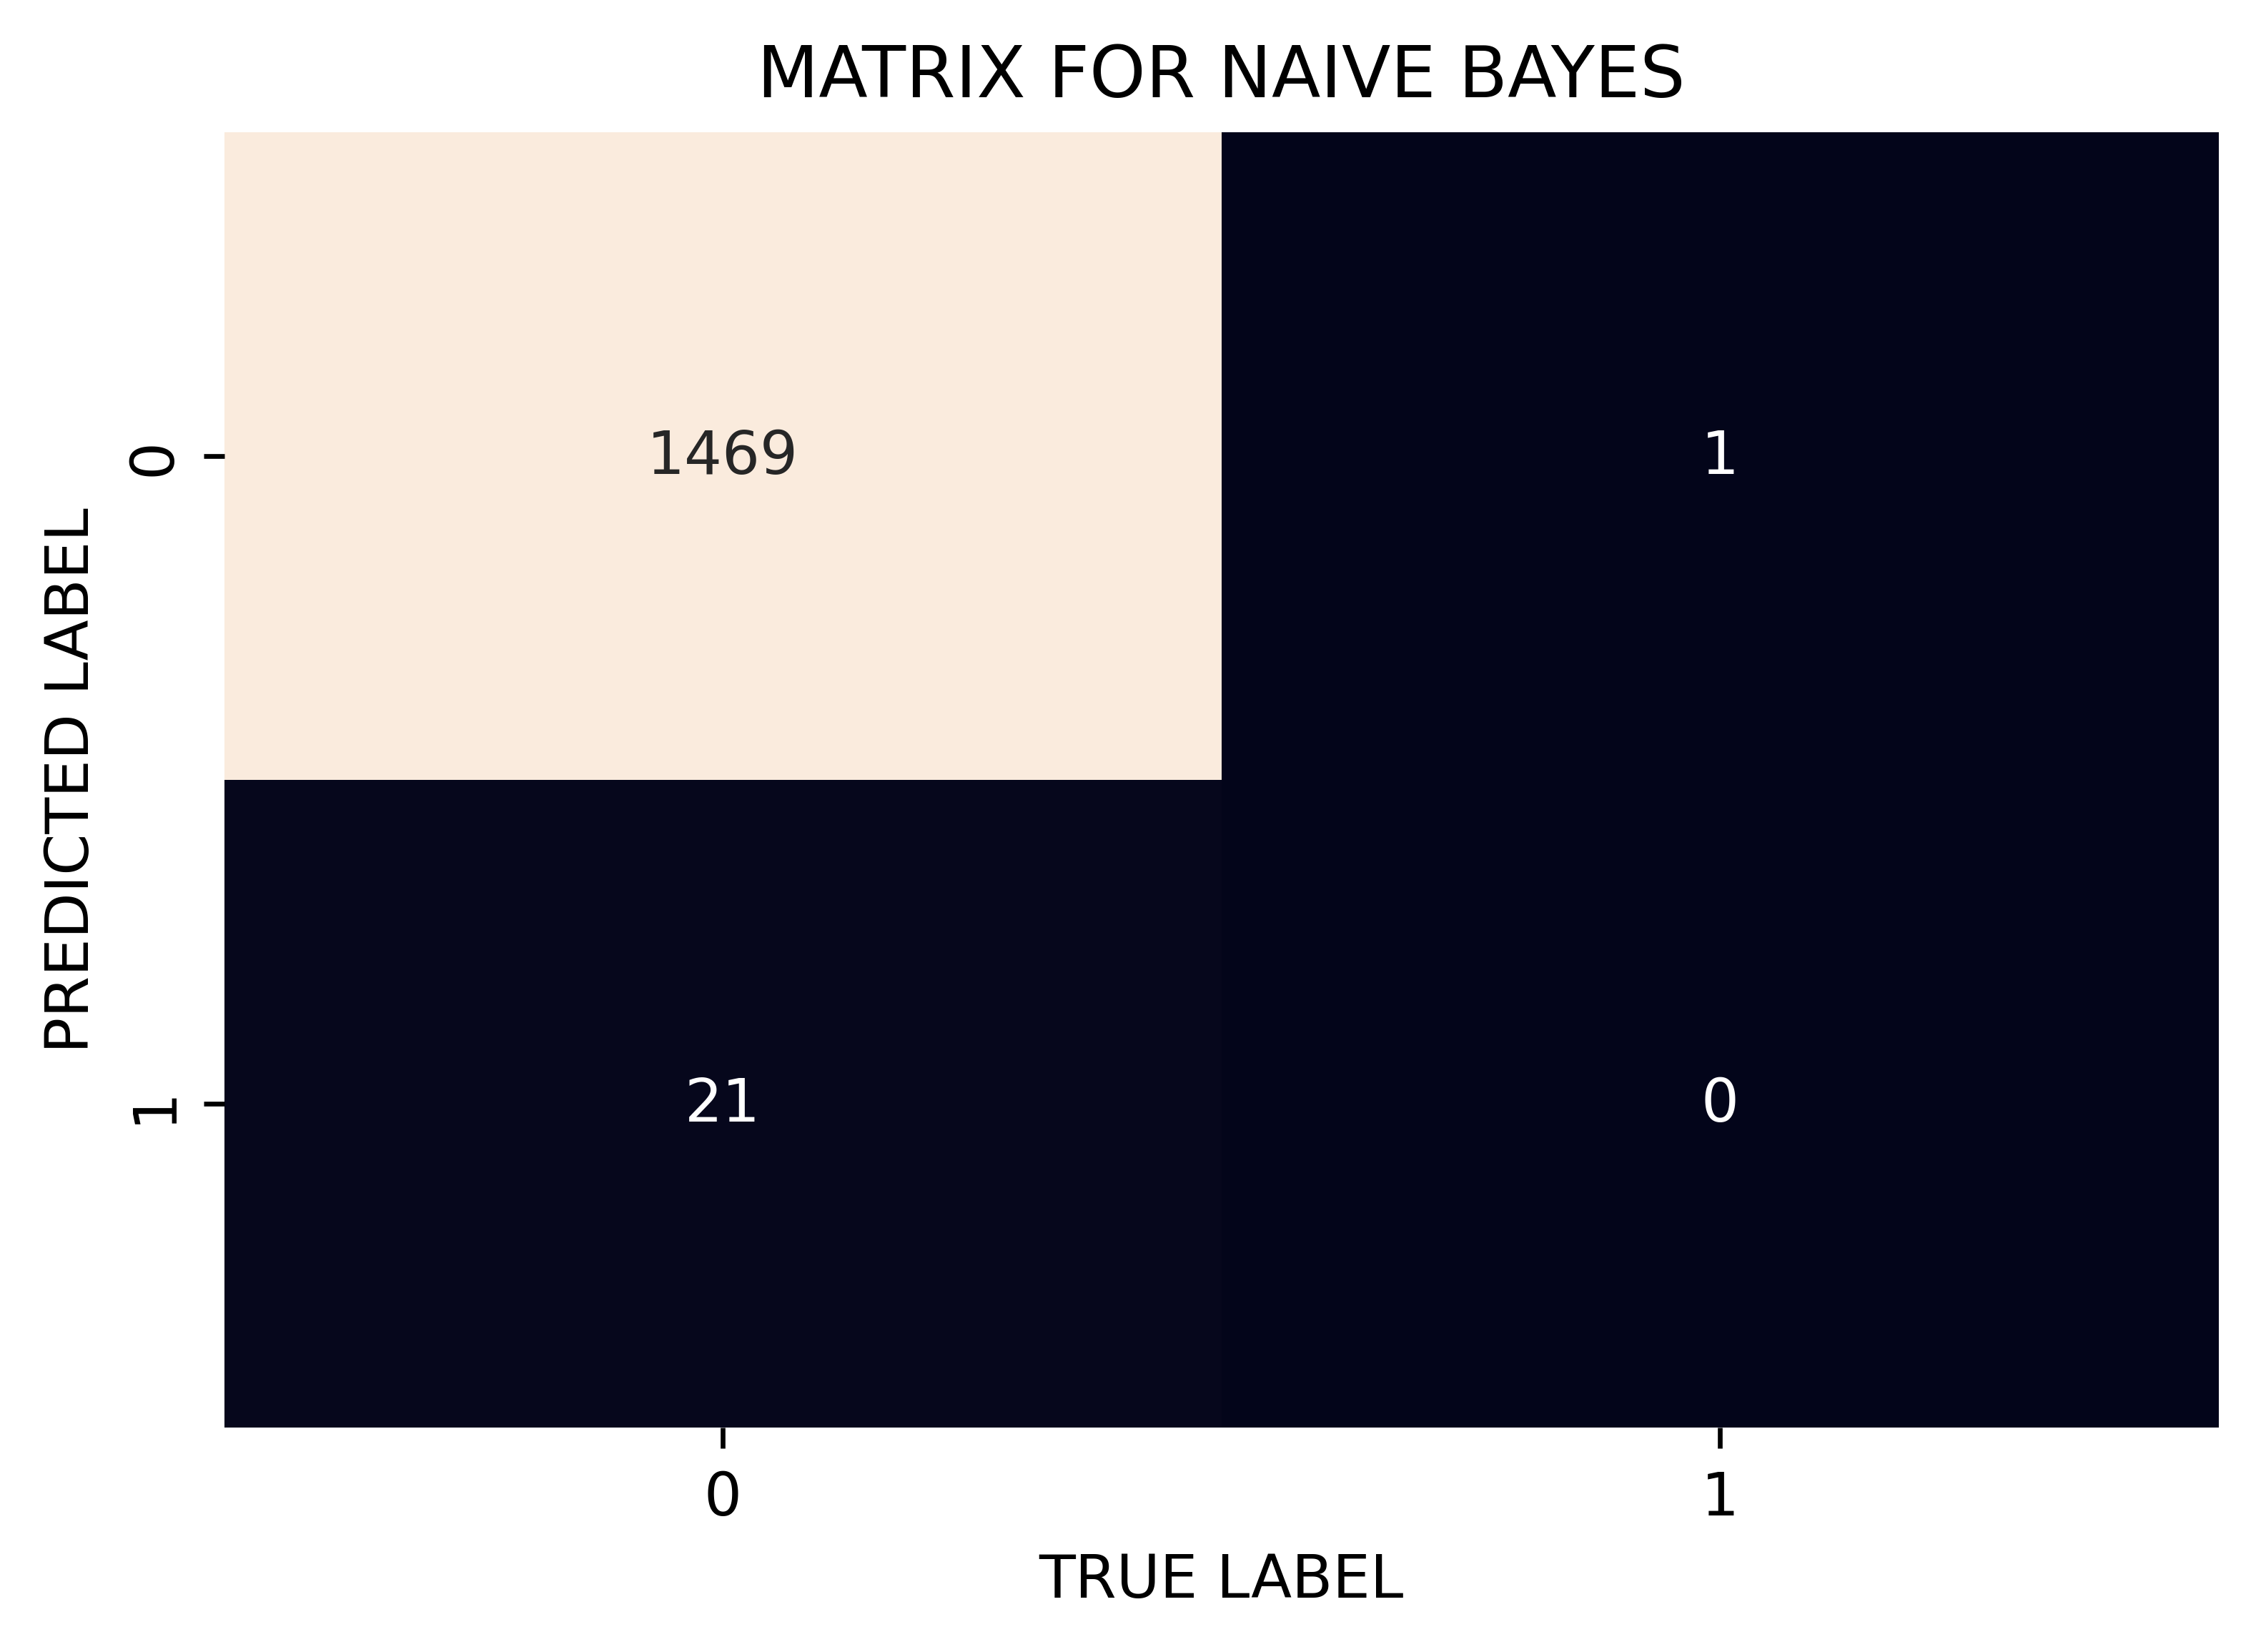

In [277]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(b_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('MATRIX FOR NAIVE BAYES')
plt.xlabel('TRUE LABEL')
plt.ylabel('PREDICTED LABEL')
plt.savefig("confusion_matrix.png")
plt.show()

In [241]:
score_naive = accuracy_score(predicted_naive, b_test)
print("NAIVES BAYES FOR TEXT SAMPLE 2 IS ",score_naive)

NAIVES BAYES FOR TEXT SAMPLE 2 IS  0.9852448021462106
